In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [25]:
# %env XLA_PYTHON_CLIENT_ALLOCATOR=platform

from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict
from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols
from synbio_morpher.utils.data.data_format_tools.common import write_json
from functools import partial

from sklearn.metrics import r2_score  
import os
import sys
import numpy as np
import haiku as hk
import jax
import optax

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import wandb

from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

jax.config.update('jax_platform_name', 'gpu')


# if __package__ is None:

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

__package__ = os.path.basename(module_path)

rng = jax.random.PRNGKey(0)

jax.devices()



[cuda(id=0)]

In [26]:
fn = '../data/processed/ensemble_mutation_effect_analysis/2023_07_17_105328/tabulated_mutation_info.csv'
fn_test_data = '../data/raw/ensemble_mutation_effect_analysis/2023_10_03_204819/tabulated_mutation_info.csv'
data = pd.concat([pd.read_csv(fn, index_col=0), pd.read_csv(fn_test_data, index_col=0)])
len(data)

3258000

In [27]:
# data = data_og.iloc[:10000]

# Robustness metric

Testing a robustness metric with sensitivity and precision.

In [28]:
data['robustness'] = np.log10(data['sensitivity_wrt_species-6']) / (np.log10(data['precision_wrt_species-6']) / 100)

In [29]:
data['robustness'].min()

-100.00000737367185

In [30]:
data['robustness'].max()

0.001019849292479575

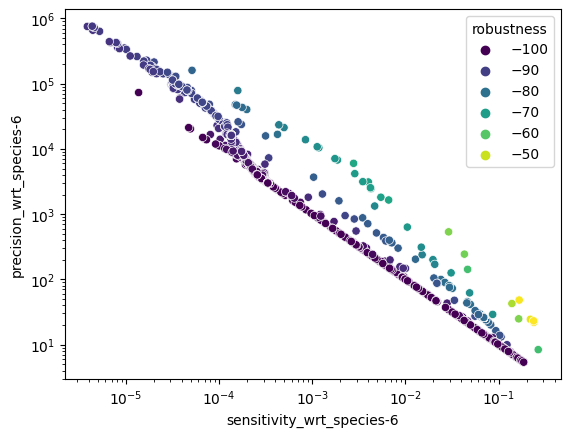

In [23]:
sns.scatterplot(data=data[data['sample_name'] != 'RNA_0'], x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='robustness', palette='viridis')
plt.xscale('log')
plt.yscale('log')